In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from PIL import Image 
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'd:\\Laxmi\\Traffic Light detection'

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error in loading the image")
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
if os.path.exists('training'):
    print("The directory already exists")
else:
    os.mkdir('training')

    np.save('./training/data',data)
    np.save('./training/target',labels)

The directory already exists


In [8]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [9]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [10]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=0)

In [11]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(31367, 30, 30, 3) (31367,) (7842, 30, 30, 3) (7842,)


## Converting the labels into ONE HOT ENCODING

In [12]:
y_train= to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [13]:
y_train.shape

(31367, 43)

## MODEL BUILDING

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Compilation

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [16]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',start_from_epoch=0,patience=3)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [18]:
history = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test),callbacks=[early_stopping])

Epoch 1/20


981/981 [==============================] - 27s 27ms/step - loss: 1.9374 - acc: 0.4978 - val_loss: 0.6037 - val_acc: 0.8429
Epoch 2/20
981/981 [==============================] - 29s 30ms/step - loss: 0.8390 - acc: 0.7543 - val_loss: 0.2878 - val_acc: 0.9171
Epoch 3/20
981/981 [==============================] - 44s 45ms/step - loss: 0.6459 - acc: 0.8069 - val_loss: 0.2417 - val_acc: 0.9350
Epoch 4/20
981/981 [==============================] - 38s 39ms/step - loss: 0.5417 - acc: 0.8386 - val_loss: 0.2163 - val_acc: 0.9444
Epoch 5/20
981/981 [==============================] - 37s 37ms/step - loss: 0.4503 - acc: 0.8633 - val_loss: 0.2513 - val_acc: 0.9265
Epoch 6/20
981/981 [==============================] - 30s 30ms/step - loss: 0.3908 - acc: 0.8833 - val_loss: 0.1631 - val_acc: 0.9538
Epoch 7/20
981/981 [==============================] - 28s 29ms/step - loss: 0.3434 - acc: 0.8946 - val_loss: 0.1392 - val_acc: 0.9612
Epoch 8/20
981/981 [==============================] - 29s 30

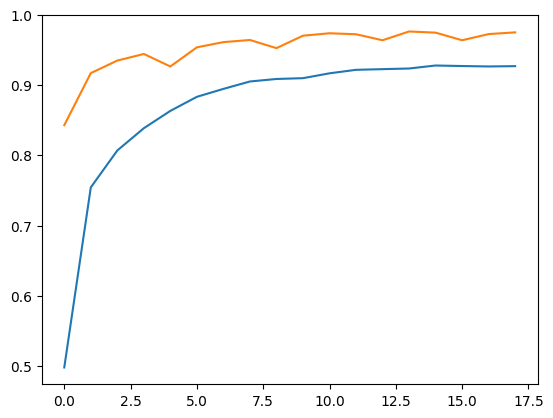

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

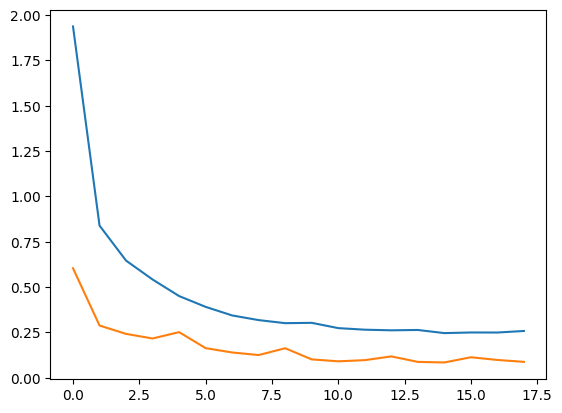

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Testing Accuracy on the testdata

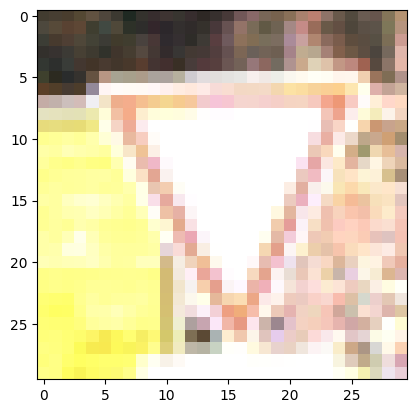

In [21]:
plt.imshow(x_test[1])

In [27]:
model.predict(x_test[1].reshape(1,30,30,3)).argmax(axis=1)

1/1 [==============================] - 0s 92ms/step


array([13], dtype=int64)

In [31]:
Y_test = pd.read_csv('D:\Laxmi\Traffic Light detection\Test.csv')

labels = Y_test['ClassId'].values
imgs = Y_test['Path'].values

test_ds =[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    test_ds.append(np.array(image))

X_test = np.array(test_ds)
    

In [38]:
pred = model.predict(X_test).argmax(axis=1)

395/395 [==============================] - 3s 9ms/step


In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9303246239113222


In [45]:
if os.path.exists('MODEL'):
    print('THE PATH EXISTS')
else:
    os.mkdir('MODEL')

model.save('.\MODEL\my_model.h5')

THE PATH EXISTS


In [48]:
model= load_model('./MODEL/my_model.h5')

In [54]:
model.predict(X_test[3].reshape(1,30,30,3)).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([33], dtype=int64)

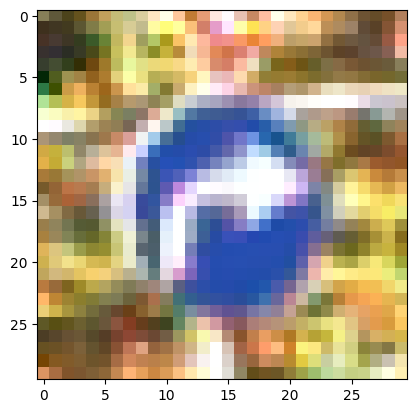

In [55]:
plt.imshow(X_test[3])